# Problem 3

Use this notebook to write your code for problem 3 by filling in the sections marked `# TODO` and running all cells.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

global  data_table 

data_table = {
        "t": [],
        "b": [],
        "w1":[],
        "w2":[],
        "x1":[],
        "x2":[],
        "y":[]
    }
from perceptron_helper import (
    predict,
    plot_data,
    boundary,
    plot_perceptron,
)

# Fix random seed for reproducibility
np.random.seed(42)

%matplotlib inline

## Implementation of Perceptron

First, we will implement the perceptron algorithm. 
Fill in the `update_perceptron()` function so that it finds a single misclassified point and updates the weights and bias accordingly. 
If no point exists, the weights and bias should not change.

Hint: You can use the `predict()` helper method, which labels a point 1 or -1 depending on the weights and bias.

In [13]:
def update_perceptron(X, Y, w, b):
    """
        This method updates a perceptron model. Takes in the previous weights
        and returns weights after an update, which could be nothing.

    Inputs:
            X: A (N, D) shaped numpy array containing N points of D dimensions.
            Y: A (N, ) shaped numpy array containing the N labels (one for each point in X).
            w: A (D, ) shaped numpy array containing the initial weight vector of D dimensions.
            b: A float containing the bias term.

        Output:
            next_w: A (D, ) shaped numpy array containing the next weight vector
                    after updating on a single misclassified point, if one exists.
            next_b: The next float bias term after updating on a single
                    misclassified point, if one exists.
    """
    next_w, next_b = np.copy(w), np.copy(b)
    
    """
    CORRECTIONS:
    I did not utilize the predict helper function and as a result had to iterate through
    all the points checking them without being able to predict and pass on correct points.
    
    Furthermore I did not fully understand what the bias updates were and just used it to iterate
    through the data
    """

    # ==============================================
    # TODO: Implement update rule for perceptron.
    # ===============================================
    
#     # First instance of update perceptron starts with bias = 0.0    
#     if b == 0.0 and w[0] == 0.0 and w[1] == 1.0:
#         next_w = [(w[0]+X[0][0])*Y[0], (w[1]+X[0][1])*Y[0]]
#         next_b += 1
        
#     # All other instances apart from the first one    
#     elif b < len(X) and b != 0.0:
#         next_w = [(w[0]+X[int(b)][0])*Y[int(b)], (w[1]+X[int(b)][1])*Y[int(b)]]
#         next_b += 1
        
    
    
#     print("Next Weight: {}. Next Bias: {}".format(next_w, next_b))
#     print()
#     return next_w, next_b


    # CORRECTED CODE
    for i in range(X.shape[0]):  # Iterates through the X set
        if predict(X[i], w, b) != Y[i]:  # Checks preditction via weight vector to actual value
            next_w = w + Y[i]*X[i]  # Updates weights and Bias's if prediction was wrong
            next_b = b + Y[i]
            return next_w, next_b  # Returns new weight vector and bias
    return next_w, next_b  # Else if prediction is correct, return the og value

Next you will fill in the `run_perceptron()` method. 
The method performs single updates on a misclassified point until convergence, or max_iter updates are made. The function will return the final weights and bias. 
You should use the `update_perceptron()` method you implemented above.

In [14]:
def run_perceptron(X, Y, w, b, max_iter):
    """
    This method runs the perceptron learning algorithm. Takes in initial weights
    and runs max_iter update iterations. Returns final weights and bias.

    Inputs:
        X: A (N, D) shaped numpy array containing N points of D dimensions.
        Y: A (N, ) shaped numpy array containing the N labels (one for each point in X).
        w: A (D, ) shaped numpy array containing the initial weight vector of D dimensions.
        b: A float containing the initial bias term.
        max_iter: An int for the maximum number of updates evaluated.

    Output:
        w: A (D, ) shaped numpy array containing the final weight vector.
        b: The final float bias term.
    """
   
    # ============================================
    # TODO: Implement perceptron update loop.
    # =============================================
    for i in range(max_iter):
        w, b = update_perceptron(X,Y,w,b)
        data_table["t"].append(i)
        data_table["b"].append(b)
        data_table["w1"].append(w[0])
        data_table["w2"].append(w[1])
        data_table["x1"].append(X[0][0])
        data_table["x2"].append(X[0][1])
        data_table["y"].append(Y)
        
        
    return w, b

# Problem 3A

## Visualizing a Toy Dataset

We will begin by training our perceptron on a toy dataset of 3 points. 
The green points are labeled +1 and the red points are labeled -1. 
We use the helper function `plot_data()` to do so.

In [15]:
X = np.array([[-3, -1], [0, 3], [1, -2]])
Y = np.array([-1, 1, 1])

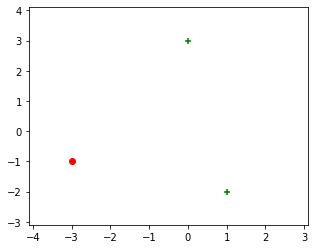

In [16]:
fig = plt.figure(figsize=(5, 4))
ax = fig.gca()
ax.set_xlim(-4.1, 3.1)
ax.set_ylim(-3.1, 4.1)
plot_data(X, Y, ax)

## Running the Perceptron

Next, we will run the perceptron learning algorithm on this dataset. Update the code to show the weights and bias at each timestep and the misclassified point used in each update. You may change the `update_perceptron()` method to do this, but be sure to update the starter code as well to reflect those changes. 

Run the below code, and fill in the corresponding table in the set.

In [17]:
# Initialize weights and bias.
weights = np.array([0.0, 1.0])
bias = 0.0

weights, bias = run_perceptron(X, Y, weights, bias, 12)

print()
print(f"final w = {weights}, final b = {bias}")
print()
print(data_table)
## This does not follow the table given in the HW 1
## It does plot out a correctly functioning boundary for classification.

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11

final w = [2. 0.], final b = 3.0

{'t': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'b': [1.0, 2.0, 3.0, array(3.), array(3.), array(3.), array(3.), array(3.), array(3.), array(3.), array(3.), array(3.)], 'w1': [1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], 'w2': [-1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'x1': [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3], 'x2': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], 'y': [array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1]), array([-1,  1,  1])]}


Solutions:
I was unable to recreate the same perceptron classifier as the solutions but was able to form one that was able to sort the toy dataset. The most confusing part for me was the bias. Now looking at the solutions I see how the predict function worked and why I needed to use it. 

I did not provide a table but from the above outputs can arrange one. 

## Visualizating the Perceptron

Getting all that information in table form isn't very informative. Let us visualize what the decision boundaries are at each timestep instead.

The helper functions `boundary()` and `plot_perceptron()` plot a decision boundary given a perceptron weights and bias. Note that the equation for the decision boundary is given by:

$$w_1x_1 + w_2x_2 + b = 0.$$ 

Using some algebra, we can obtain $x_2$ from $x_1$ to plot the boundary as a line. 

$$x_2 = \frac{-w_1x_2 - b}{w_2}.$$

Below is a redefinition of the `run_perceptron()` method to visualize the points and decision boundaries at each timestep instead of printing.
Fill in the method using your previous `run_perceptron()` method, and the above helper methods.

Hint: The `axs` element is a list of Axes, which are used as subplots for each timestep. 
You can do the following:
```python
ax = axs[i]
```
to get the plot correponding to $t = i$. 
You can then use `ax.set_title()` to title each subplot. 
You will want to use the `plot_data()` and `plot_perceptron()` helper methods.

In [18]:
def run_perceptron_with_plots(X, Y, w, b, max_iter, axs=None):
    """
    This method runs the perceptron learning algorithm. Takes in initial weights
    and runs max_iter update iterations. Returns final weights and bias.

    Inputs:
        X: A (N, D) shaped numpy array containing N points of D dimensions.
        Y: A (N, ) shaped numpy array containing the N labels (one for each point in X).
        w: A (D, ) shaped numpy array containing the initial weight vector of D dimensions.
        b: A float containing the initial bias term.
        max_iter: An int for the maximum number of updates evaluated.
        axs: A list of Axes that contain suplots for each timestep.

    Output:
        The final weight and bias vectors.
    """

    if axs == None:
        run_perceptron(X, Y, w, b, max_iter)
        
    
    # ============================================
    # TODO: Implement perceptron update loop.
    # =============================================
    for i in range(max_iter):
        print("Iteration {}".format(i))
        plot_perceptron(w,b,axs[i])
        plot_data(X,Y,axs[i])
        w, b = update_perceptron(X,Y,w,b)
        
    """
    CORRECTIONS:
    NONE ALL CORRECT
    
    """
        

    return w, b

Run the below code to get a visualization of the perceptron algorithm. The red region are areas the perceptron thinks are negative examples.

Iteration 0
Iteration 1
Iteration 2
Iteration 3


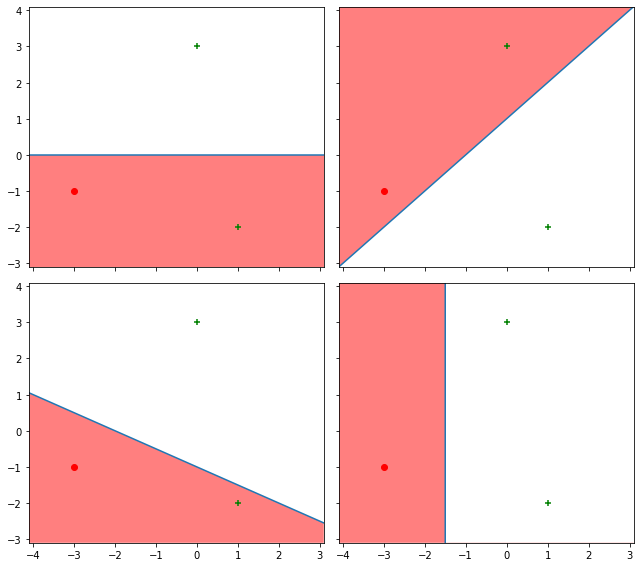

In [19]:
# Initialize weights and bias.
weights = np.array([0.0, 1.0])
bias = 0.0

# Note: there are 4 subplots and max_iter=4 below. Plot BEFORE each timestep update.
f, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 8))
axs = list(itertools.chain.from_iterable(ax_arr))
for ax in axs:
    ax.set_xlim(-4.1, 3.1)
    ax.set_ylim(-3.1, 4.1)

run_perceptron_with_plots(X, Y, weights, bias, 4, axs)

f.tight_layout()

# Problem 3C

## Visualize a Non-linearly Separable Dataset.

We will now work on a dataset that cannot be linearly separated, namely one that is generated by the XOR function.

In [20]:
X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

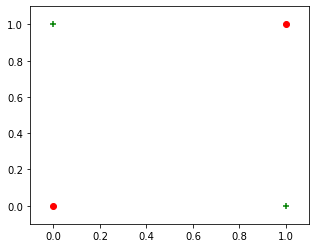

In [21]:
fig = plt.figure(figsize=(5, 4))
ax = fig.gca()
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plot_data(X, Y, ax)

We will now run the perceptron algorithm on this dataset. We will limit the total timesteps this time, but you should see a pattern in the updates. Run the below code.

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15


'\nCORRECTIONS:\n'

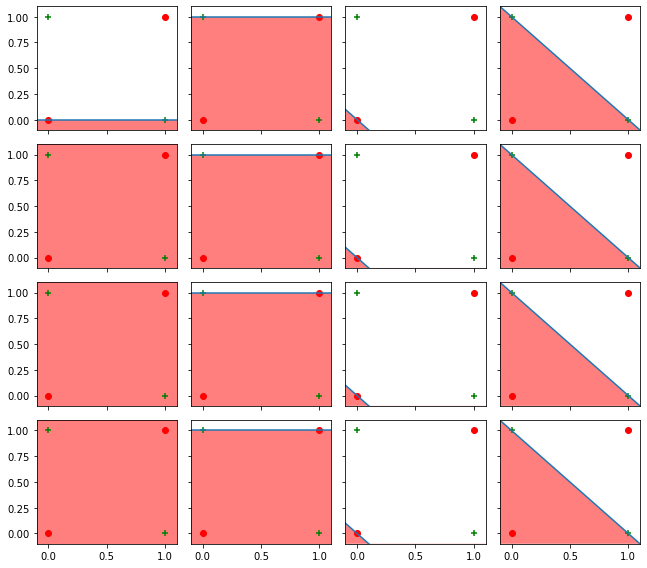

In [23]:
# Initialize weights and bias.
weights = np.array([0.0, 1.0])
bias = 0.0

# Note: there are 16 subplots and max_iter=16. Plot BEFORE each timestep update.
f, ax_arr = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(9, 8))
axs = list(itertools.chain.from_iterable(ax_arr))
for ax in axs:
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

run_perceptron_with_plots(X, Y, weights, bias, 16, axs)

f.tight_layout()
"""
CORRECTIONS:
NONE, ALL CORRECT
"""
#### The PLA will never converge due to the nature of the non-linear dataset. 